In [1]:
import pandas as pd
#importing data
data = pd.read_csv('/content/DRUG-AE (copy).txt', sep='|', names=["PubMed-ID", "Sentence", "Adverse-Effect", "Begin Offset AE", "End Offset AE", "Drug", "Begin Offset Drug", "End Offset Drug"])
data

,PubMed-ID,Sentence,Adverse-Effect,Begin Offset AE,End Offset AE,Drug,Begin Offset Drug,End Offset Drug
0,10030778,Intravenous azithromycin-induced ototoxicity.,ototoxicity,43,54,azithromycin,22,34
1,10048291,"Immobilization, while Paget's bone disease was...",increased calcium-release,960,985,dihydrotachysterol,908,926
2,10048291,Unaccountable severe hypercalcemia in a patien...,hypercalcemia,31,44,dihydrotachysterol,94,112
3,10082597,METHODS: We report two cases of pseudoporphyri...,pseudoporphyria,620,635,naproxen,646,654
4,10082597,METHODS: We report two cases of pseudoporphyri...,pseudoporphyria,620,635,oxaprozin,659,668
...,...,...,...,...,...,...,...,...
6816,998323,Lithium treatment was terminated in 1975 becau...,lithium intoxication,531,551,Lithium,479,486
6817,998323,Lithium treatment was terminated in 1975 becau...,lithium intoxication,531,551,lithium,531,538
6818,9988365,Eosinophilia caused by clozapine was observed ...,Eosinophilia,795,807,clozapine,818,827
6819,9988365,Eosinophilia has been encountered from 0.2 to ...,Eosinophilia,76,88,clozapine,131,140


Importing necessary libraries

In [2]:
import numpy as np
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Top 5 samples

In [4]:
data.head()

,PubMed-ID,Sentence,Adverse-Effect,Begin Offset AE,End Offset AE,Drug,Begin Offset Drug,End Offset Drug
0,10030778,Intravenous azithromycin-induced ototoxicity.,ototoxicity,43,54,azithromycin,22,34
1,10048291,"Immobilization, while Paget's bone disease was...",increased calcium-release,960,985,dihydrotachysterol,908,926
2,10048291,Unaccountable severe hypercalcemia in a patien...,hypercalcemia,31,44,dihydrotachysterol,94,112
3,10082597,METHODS: We report two cases of pseudoporphyri...,pseudoporphyria,620,635,naproxen,646,654
4,10082597,METHODS: We report two cases of pseudoporphyri...,pseudoporphyria,620,635,oxaprozin,659,668


## Graphs

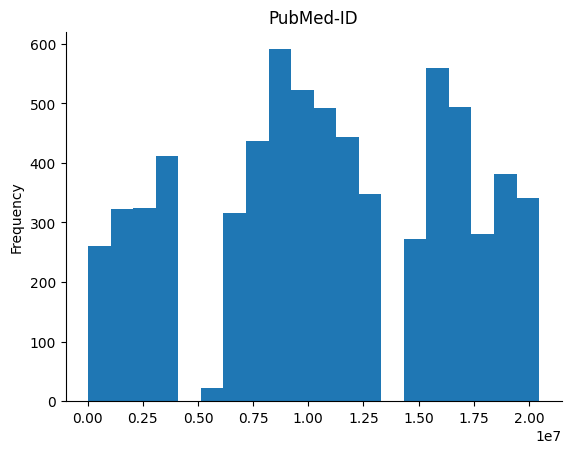

In [90]:
# @title PubMed-ID

from matplotlib import pyplot as plt
data['PubMed-ID'].plot(kind='hist', bins=20, title='PubMed-ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

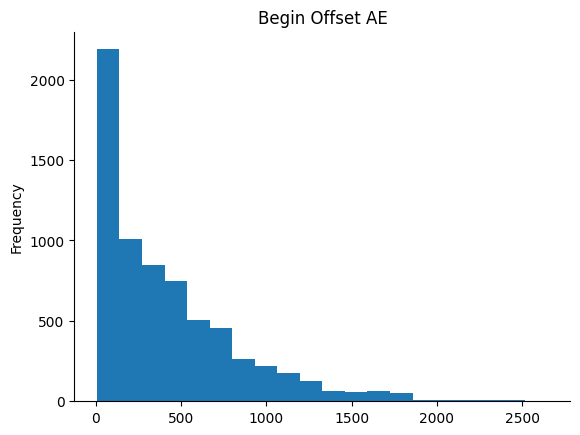

In [89]:
# @title Begin Offset AE

from matplotlib import pyplot as plt
data['Begin Offset AE'].plot(kind='hist', bins=20, title='Begin Offset AE')
plt.gca().spines[['top', 'right',]].set_visible(False)

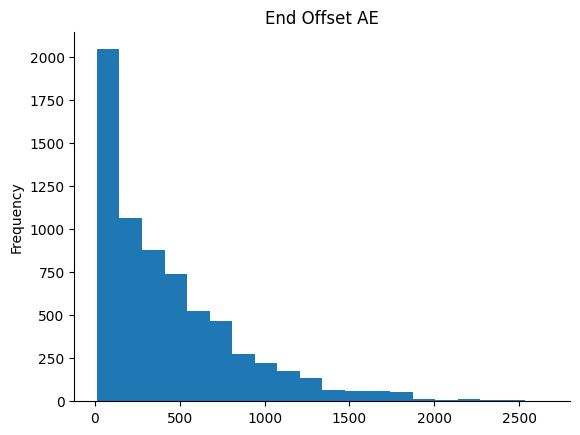

In [88]:
# @title End Offset AE

from matplotlib import pyplot as plt
data['End Offset AE'].plot(kind='hist', bins=20, title='End Offset AE')
plt.gca().spines[['top', 'right',]].set_visible(False)

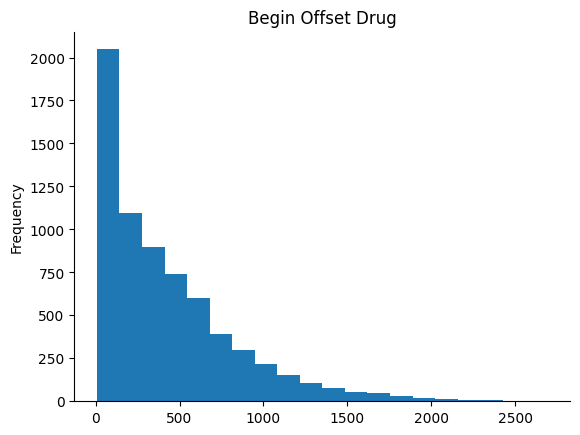

In [87]:
# @title Begin Offset Drug

from matplotlib import pyplot as plt
data['Begin Offset Drug'].plot(kind='hist', bins=20, title='Begin Offset Drug')
plt.gca().spines[['top', 'right',]].set_visible(False)

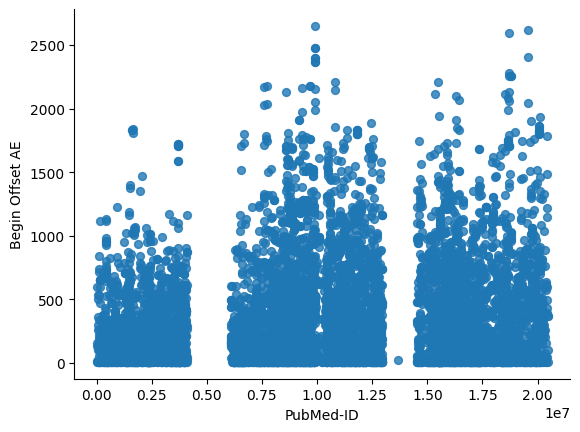

In [86]:
# @title PubMed-ID vs Begin Offset AE

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='PubMed-ID', y='Begin Offset AE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

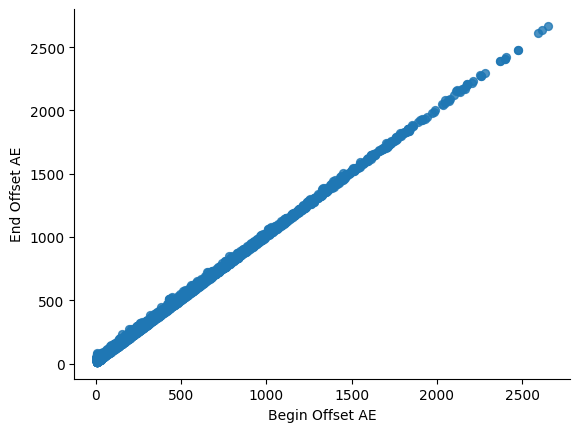

In [85]:
# @title Begin Offset AE vs End Offset AE

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Begin Offset AE', y='End Offset AE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

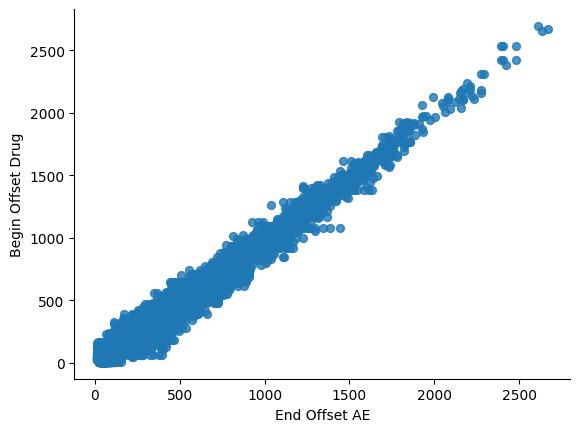

In [84]:
# @title End Offset AE vs Begin Offset Drug

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='End Offset AE', y='Begin Offset Drug', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

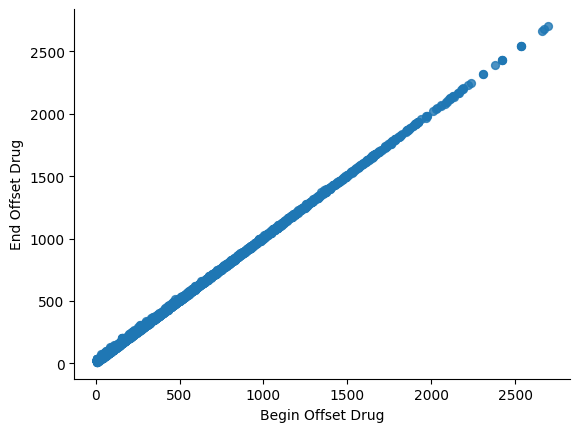

In [83]:
# @title Begin Offset Drug vs End Offset Drug

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Begin Offset Drug', y='End Offset Drug', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

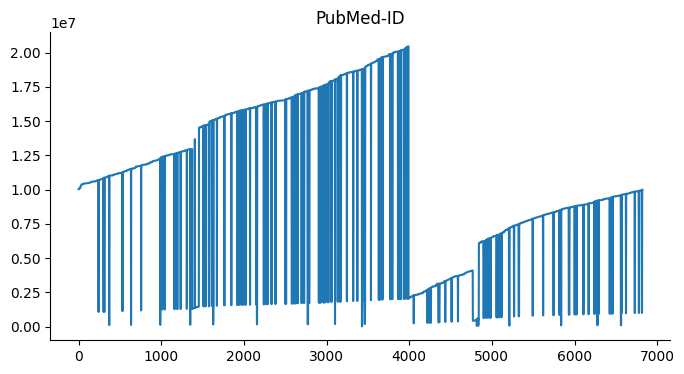

In [82]:
# @title PubMed-ID

from matplotlib import pyplot as plt
data['PubMed-ID'].plot(kind='line', figsize=(8, 4), title='PubMed-ID')
plt.gca().spines[['top', 'right']].set_visible(False)

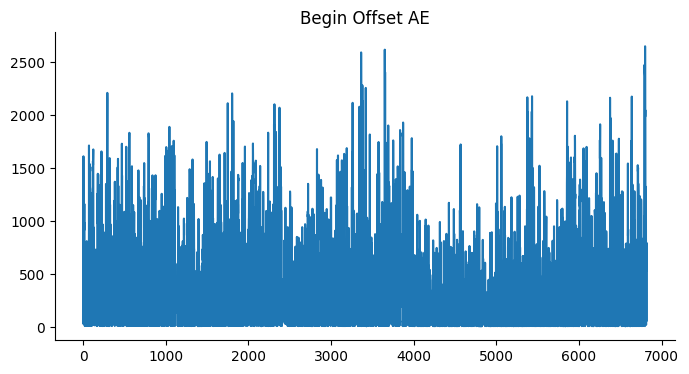

In [81]:
# @title Begin Offset AE

from matplotlib import pyplot as plt
data['Begin Offset AE'].plot(kind='line', figsize=(8, 4), title='Begin Offset AE')
plt.gca().spines[['top', 'right']].set_visible(False)

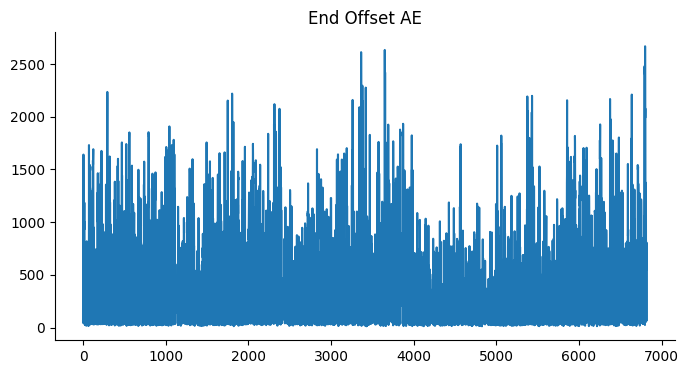

In [80]:
# @title End Offset AE

from matplotlib import pyplot as plt
data['End Offset AE'].plot(kind='line', figsize=(8, 4), title='End Offset AE')
plt.gca().spines[['top', 'right']].set_visible(False)

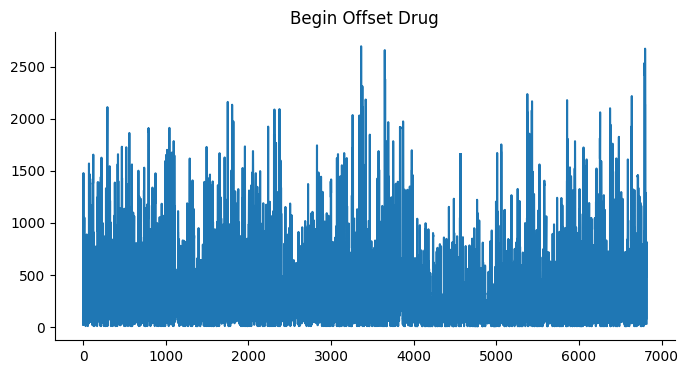

In [79]:
# @title Begin Offset Drug

from matplotlib import pyplot as plt
data['Begin Offset Drug'].plot(kind='line', figsize=(8, 4), title='Begin Offset Drug')
plt.gca().spines[['top', 'right']].set_visible(False)

Description of the ADE dataset

In [6]:
print("Shape of the dataset:", data.shape)

Shape of the dataset: (6821, 8)


In [8]:
print("Column names:", data.columns)

Column names: Index(['PubMed-ID', 'Sentence', 'Adverse-Effect', 'Begin Offset AE',
       'End Offset AE', 'Drug', 'Begin Offset Drug', 'End Offset Drug'],
      dtype='object')


In [10]:
print("Data types of columns:\n", data.dtypes)

Data types of columns:
 PubMed-ID             int64
Sentence             object
Adverse-Effect       object
Begin Offset AE       int64
End Offset AE         int64
Drug                 object
Begin Offset Drug     int64
End Offset Drug       int64
dtype: object


In [12]:
print("Number of unique values in each column:\n", data.nunique())

Number of unique values in each column:
 PubMed-ID            1644
Sentence             4271
Adverse-Effect       3341
Begin Offset AE      1366
End Offset AE        1357
Drug                 1319
Begin Offset Drug    1293
End Offset Drug      1286
dtype: int64


In [76]:
# Calculate co-occurrence frequencies of drug-adverse effect pairs
co_occurrence=data.groupby(['Drug', 'Adverse-Effect']).size().reset_index(name='Frequency')

#Sort by frequency to identify common associations
co_occurrence_sorted=co_occurrence.sort_values(by='Frequency', ascending=False)

# Display the top associations
print("Top Drug-Adverse Effect Associations:")
print(co_occurrence_sorted.head(10))

Top Drug-Adverse Effect Associations:
                 Drug      Adverse-Effect  Frequency
2819625       heparin    thrombocytopenia         24
2729971   gemcitabine                 HUS          8
1783933    amiodarone      thyrotoxicosis          8
2901502    indapamide            diabetes          7
2387467  desmopressin        hyponatremia          7
3140030    lovastatin      rhabdomyolysis          6
3116262       lithium       neurotoxicity          6
2639400   fludarabine                AIHA          6
1782757    amiodarone      hypothyroidism          6
2615542      fentanyl  serotonin syndrome          6


In [13]:
print("Distribution of Adverse-Effect:\n", data['Adverse-Effect'].value_counts())
print("\nDistribution of Drug:\n", data['Drug'].value_counts())

Distribution of Adverse-Effect:
 fever                             61
thrombocytopenia                  56
neurotoxicity                     54
rhabdomyolysis                    44
seizures                          42
                                  ..
mammary hyperplasia                1
skin cancers                       1
painful hand ulcer                 1
diffuse nail hyperpigmentation     1
infections                         1
Name: Adverse-Effect, Length: 3341, dtype: int64

Distribution of Drug:
 methotrexate                   151
lithium                         92
amiodarone                      74
carbamazepine                   69
MTX                             65
                              ... 
povidone                         1
iodine                           1
Halothane                        1
halothane                        1
amphotericin B deoxycholate      1
Name: Drug, Length: 1319, dtype: int64


In [17]:
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 PubMed-ID            0
Sentence             0
Adverse-Effect       0
Begin Offset AE      0
End Offset AE        0
Drug                 0
Begin Offset Drug    0
End Offset Drug      0
dtype: int64


Correlation Matrix between respective columns

In [19]:
data.corr()

<ipython-input-19-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,PubMed-ID,Begin Offset AE,End Offset AE,Begin Offset Drug,End Offset Drug
PubMed-ID,1.000000,0.146141,0.146065,0.145700,0.145453
Begin Offset AE,0.146141,1.000000,0.999709,0.985356,0.985235
End Offset AE,0.146065,0.999709,1.000000,0.985461,0.985348
Begin Offset Drug,0.145700,0.985356,0.985461,1.000000,0.999940
End Offset Drug,0.145453,0.985235,0.985348,0.999940,1.000000


Overall summary of dataset

In [20]:
data.describe()

,PubMed-ID,Begin Offset AE,End Offset AE,Begin Offset Drug,End Offset Drug
count,6.821000e+03,6821.000000,6821.000000,6821.000000,6821.000000
mean,1.084703e+07,418.253189,436.867322,428.810292,439.571177
std,5.658472e+06,419.100256,418.243404,410.178481,409.625666
min,1.879500e+04,7.000000,13.000000,8.000000,12.000000
25%,7.355327e+06,87.000000,107.000000,106.000000,118.000000
50%,1.067955e+07,301.000000,321.000000,315.000000,326.000000
75%,1.600135e+07,614.000000,632.000000,611.000000,621.000000
max,2.046562e+07,2651.000000,2668.000000,2695.000000,2705.000000


Dropping points consisting of missing values

In [21]:
data.dropna(inplace=True)

## Preprocessing

In [23]:
# Preprocessing function for text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

Applying tokenisation

In [25]:
# Apply preprocessing to the Sentence column
data['Sentence'] = data['Sentence'].apply(preprocess_text)

# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data['Sentence'])

# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(data['Sentence'])

In [51]:
# Tokenize sentences into words
tokenized_sentences = [sentence.split() for sentence in data['Sentence']]

# Count words in each sentence
word_counts = [len(sentence) for sentence in tokenized_sentences]

# Calculate average sentence length
average_sentence_length = sum(word_counts) / len(word_counts)
print("Average Sentence Length:", average_sentence_length)

Average Sentence Length: 20.552704881982113


Understanding the lengths of sentences in the "Sentence" column to choose the optimal value for truncation

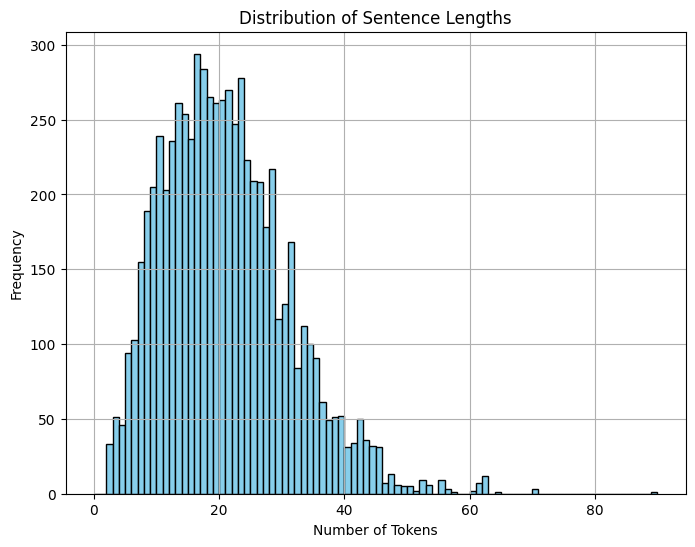

In [55]:
token_counts = data['Sentence'].apply(lambda x: len(nltk.word_tokenize(x)))

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(token_counts, bins=range(0, max(token_counts) + 1, 1), color='skyblue', edgecolor='black')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Performing padding

In [56]:
# Padding sequences to ensure uniform length
max_seq_length = 40
padded_sequences = pad_sequences(sequences, maxlen=max_seq_length, padding='post')

Label-Encoding

In [57]:
# Encoding adverse effects and drugs
data['Adverse-Effect'] = pd.Categorical(data['Adverse-Effect'])
data['Drug'] = pd.Categorical(data['Drug'])

data['AE_Encoded'] = data['Adverse-Effect'].cat.codes
data['Drug_Encoded'] = data['Drug'].cat.codes

In [58]:
# Split dataset into train, validation, and test sets
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [59]:
# Convert target labels to categorical format
num_classes_ae = len(data['Adverse-Effect'].unique())
num_classes_drug = len(data['Drug'].unique())

Number of adverse-effects classes

In [30]:
num_classes_ae

3341

Number of drug classes

In [31]:
num_classes_drug

1319

In [60]:
y_train_ae = np.eye(num_classes_ae)[train_df['AE_Encoded']]
y_val_ae = np.eye(num_classes_ae)[val_df['AE_Encoded']]
y_test_ae = np.eye(num_classes_ae)[test_df['AE_Encoded']]

In [61]:
y_train_drug = np.eye(num_classes_drug)[train_df['Drug_Encoded']]
y_val_drug = np.eye(num_classes_drug)[val_df['Drug_Encoded']]
y_test_drug = np.eye(num_classes_drug)[test_df['Drug_Encoded']]

In [62]:
# Print shapes for verification
print("Padded Sequences Shape:", padded_sequences.shape)
print("Adverse Effect Labels Shape (Train):", y_train_ae.shape)
print("Drug Labels Shape (Train):", y_train_drug.shape)

Padded Sequences Shape: (6821, 40)
Adverse Effect Labels Shape (Train): (4364, 3341)
Drug Labels Shape (Train): (4364, 1319)


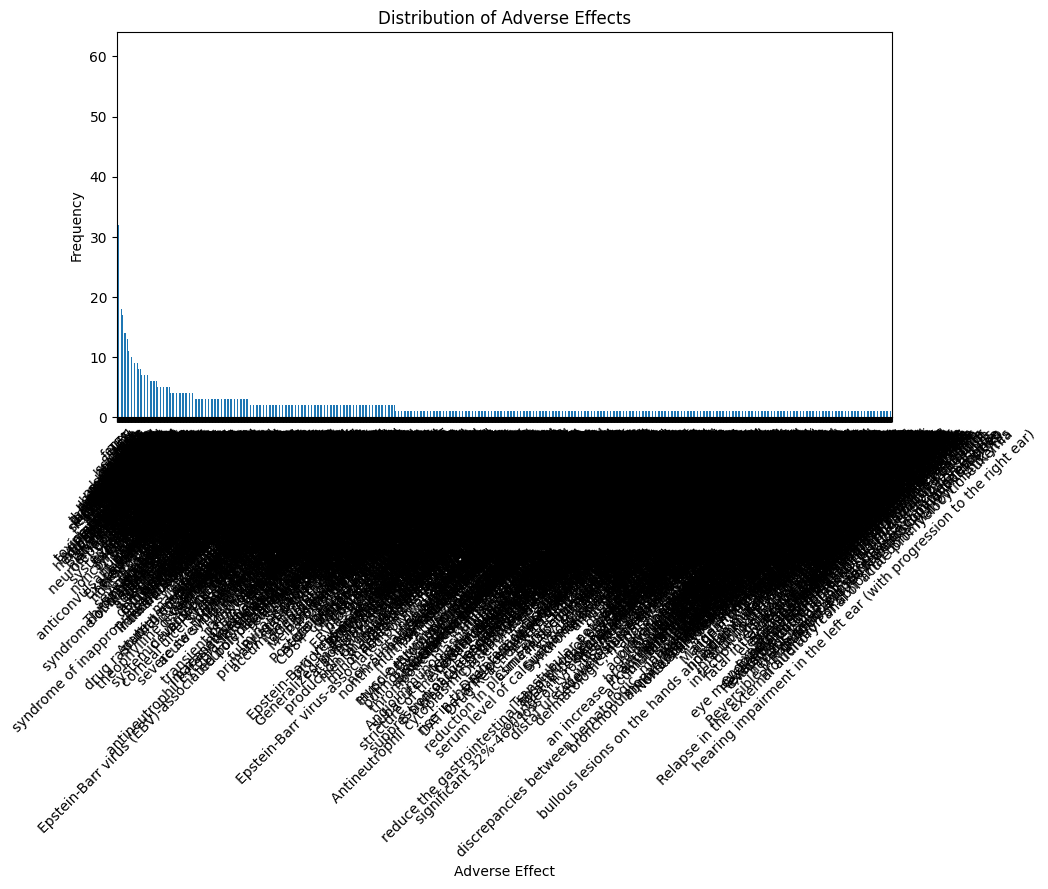

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
data['Adverse-Effect'].value_counts().plot(kind='bar')
plt.title('Distribution of Adverse Effects')
plt.xlabel('Adverse Effect')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

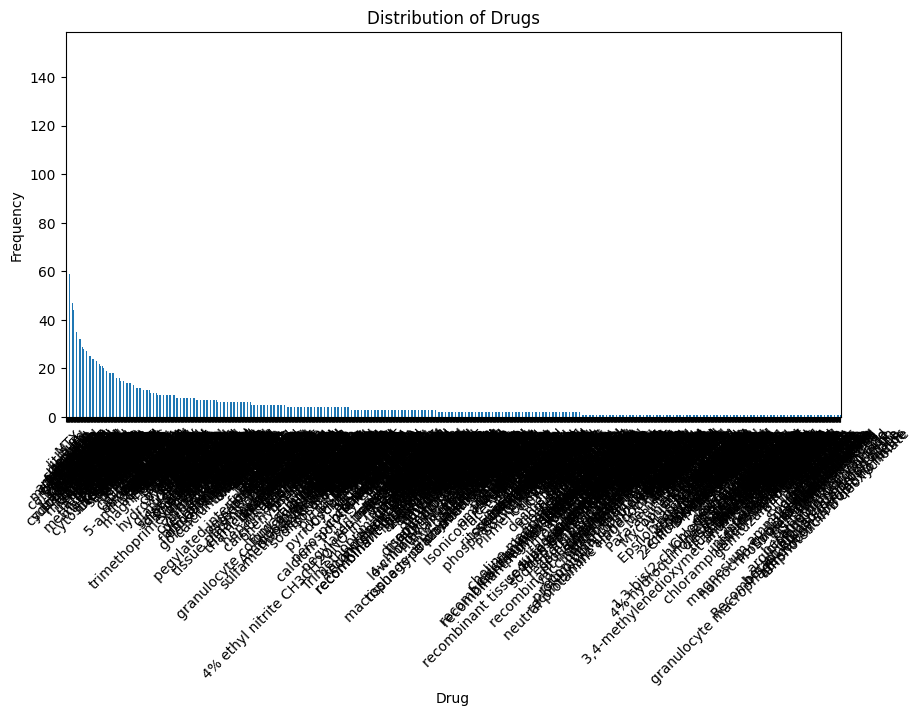

In [64]:
plt.figure(figsize=(10, 5))
data['Drug'].value_counts().plot(kind='bar')
plt.title('Distribution of Drugs')
plt.xlabel('Drug')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## Heatmap

<ipython-input-65-b55bd5bcdf6c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


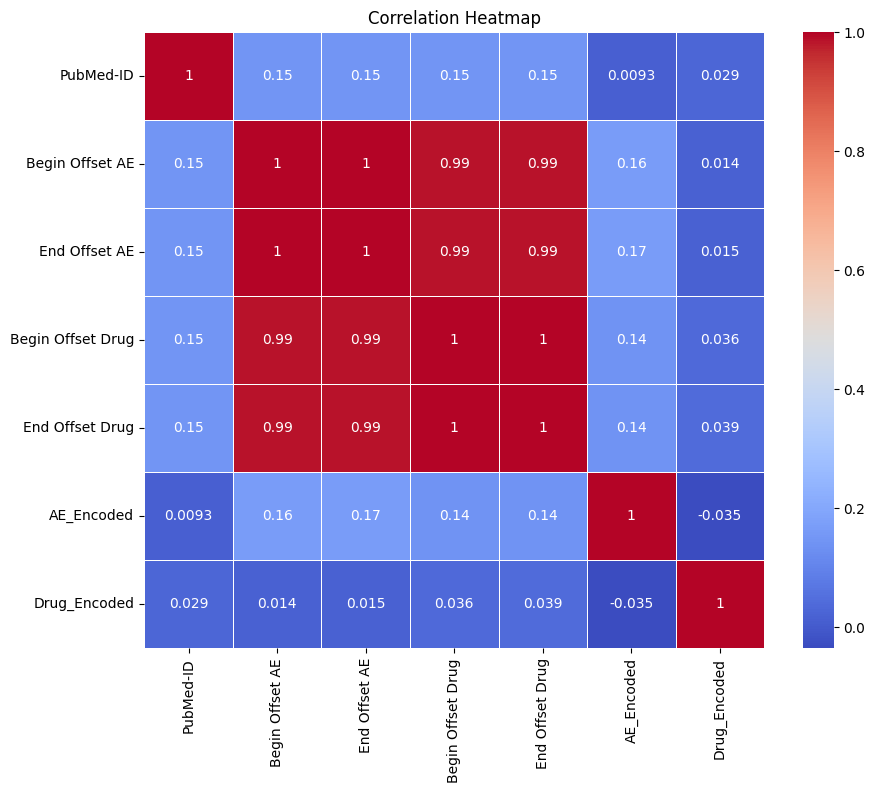

In [65]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Wordcloud**- the size of each word indicates its frequency or importance within the text

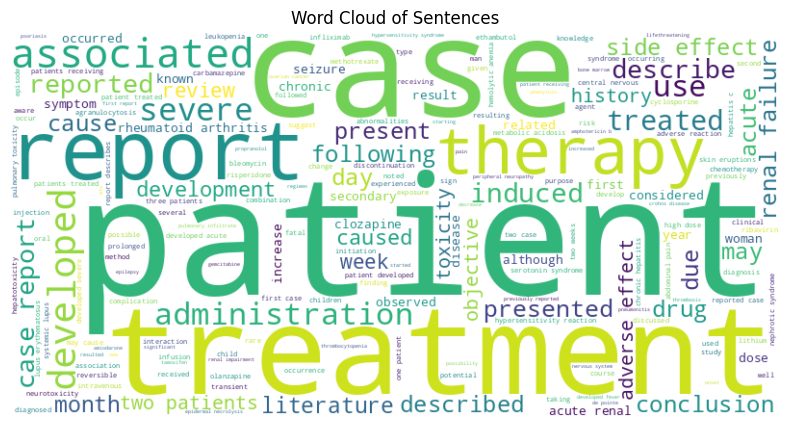

In [66]:
from wordcloud import WordCloud

text = ' '.join(data['Sentence'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Sentences')
plt.axis('off')
plt.show()

### Model Architecture

In [67]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Bidirectional

# Define input shape
input_shape = (max_seq_length,)

# Define the embedding layer
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for padding token
embedding_dim = 100
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_seq_length)

# Define the LSTM layer
lstm_units = 64  # Number of units in LSTM layer
lstm_layer = LSTM(units=lstm_units, return_sequences=False)

# Define input layer
input_layer = Input(shape=input_shape)

# Connect layers
embedded_sequences = embedding_layer(input_layer)
lstm_output = lstm_layer(embedded_sequences)

ae_output = Dense(num_classes_ae, activation='softmax', name='ae_output')(lstm_output)
drug_output = Dense(num_classes_drug, activation='softmax', name='drug_output')(lstm_output)

# Define the model
model = Model(inputs=input_layer, outputs=[ae_output, drug_output])

# Compile the model
model.compile(optimizer='adam',
              loss={'ae_output': 'categorical_crossentropy', 'drug_output': 'categorical_crossentropy'},
              metrics=['accuracy'])
# Print model summary
print(model.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 40)]                 0         []                            
                                                                                                  
 embedding_3 (Embedding)     (None, 40, 100)              803400    ['input_4[0][0]']             
                                                                                                  
 lstm_3 (LSTM)               (None, 64)                   42240     ['embedding_3[0][0]']         
                                                                                                  
 ae_output (Dense)           (None, 3341)                 217165    ['lstm_3[0][0]']              
                                                                                            

## Training and testing the designed LSTM model

Epoch 1/100
137/137 [==============================] - 7s 51ms/step - loss: 14.4356 - ae_output_loss: 7.8272 - drug_output_loss: 6.6084 - ae_output_accuracy: 0.0069 - drug_output_accuracy: 0.0218 - val_loss: 15.0462 - val_ae_output_loss: 8.3326 - val_drug_output_loss: 6.7136 - val_ae_output_accuracy: 0.0046 - val_drug_output_accuracy: 0.0275
Epoch 2/100
137/137 [==============================] - 5s 40ms/step - loss: 14.1522 - ae_output_loss: 7.6428 - drug_output_loss: 6.5094 - ae_output_accuracy: 0.0076 - drug_output_accuracy: 0.0218 - val_loss: 15.3015 - val_ae_output_loss: 8.5796 - val_drug_output_loss: 6.7219 - val_ae_output_accuracy: 0.0082 - val_drug_output_accuracy: 0.0275
Epoch 3/100
137/137 [==============================] - 7s 49ms/step - loss: 14.0633 - ae_output_loss: 7.5848 - drug_output_loss: 6.4785 - ae_output_accuracy: 0.0076 - drug_output_accuracy: 0.0218 - val_loss: 15.4137 - val_ae_output_loss: 8.6822 - val_drug_output_loss: 6.7316 - val_ae_output_accuracy: 0.0046 - v

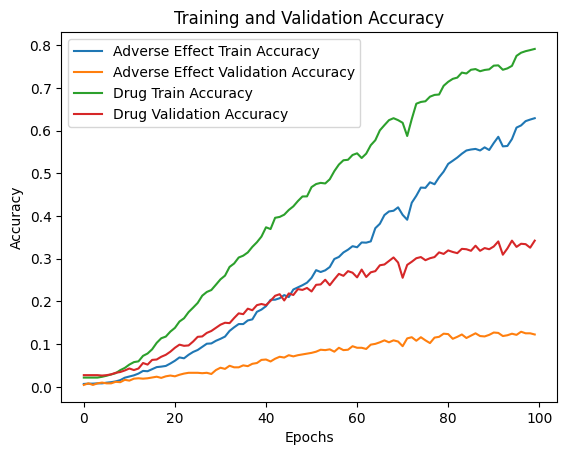

In [69]:
# Split the dataset into training, validation, and test sets
X_train = padded_sequences[train_df.index]
X_val = padded_sequences[val_df.index]
X_test = padded_sequences[test_df.index]

y_train_ae = np.eye(num_classes_ae)[train_df['AE_Encoded']]
y_val_ae = np.eye(num_classes_ae)[val_df['AE_Encoded']]
y_test_ae = np.eye(num_classes_ae)[test_df['AE_Encoded']]

y_train_drug = np.eye(num_classes_drug)[train_df['Drug_Encoded']]
y_val_drug = np.eye(num_classes_drug)[val_df['Drug_Encoded']]
y_test_drug = np.eye(num_classes_drug)[test_df['Drug_Encoded']]

# Train the model
history = model.fit(X_train, {'ae_output': y_train_ae, 'drug_output': y_train_drug},
                    validation_data=(X_val, {'ae_output': y_val_ae, 'drug_output': y_val_drug}),
                    epochs=100, batch_size=32)

# Evaluate the model on the test set
test_results = model.evaluate(X_test, {'ae_output': y_test_ae, 'drug_output': y_test_drug}, verbose=2)
print("\nTest Loss:", test_results[0])
print("Test Accuracy (Adverse Effect):", test_results[1])
print("Test Accuracy (Drug):", test_results[2])

# Plot training and validation accuracy
plt.plot(history.history['ae_output_accuracy'], label='Adverse Effect Train Accuracy')
plt.plot(history.history['val_ae_output_accuracy'], label='Adverse Effect Validation Accuracy')
plt.plot(history.history['drug_output_accuracy'], label='Drug Train Accuracy')
plt.plot(history.history['val_drug_output_accuracy'], label='Drug Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Predictions on test set
y_pred_ae, y_pred_drug = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_ae_class = np.argmax(y_pred_ae, axis=1)
y_pred_drug_class = np.argmax(y_pred_drug, axis=1)

# True class labels
y_true_ae = np.argmax(y_test_ae, axis=1)
y_true_drug = np.argmax(y_test_drug, axis=1)

# Evaluation metrics for Adverse Effect (AE)
print("Evaluation Metrics for Adverse Effect (AE):")
print("Accuracy:", accuracy_score(y_true_ae, y_pred_ae_class))
print("Precision:", precision_score(y_true_ae, y_pred_ae_class, average='weighted'))
print("Recall:", recall_score(y_true_ae, y_pred_ae_class, average='weighted'))
print("F1-Score:", f1_score(y_true_ae, y_pred_ae_class, average='weighted'))

# Evaluation metrics for Drug
print("\nEvaluation Metrics for Drug:")
print("Accuracy:", accuracy_score(y_true_drug, y_pred_drug_class))
print("Precision:", precision_score(y_true_drug, y_pred_drug_class, average='weighted'))
print("Recall:", recall_score(y_true_drug, y_pred_drug_class, average='weighted'))
print("F1-Score:", f1_score(y_true_drug, y_pred_drug_class, average='weighted'))

43/43 [==============================] - 1s 19ms/step
Evaluation Metrics for Adverse Effect (AE):
Accuracy: 0.14725274725274726
Precision: 0.1374369420610022
Recall: 0.14725274725274726
F1-Score: 0.13446339054939152

Evaluation Metrics for Drug:
Accuracy: 0.3413919413919414
Precision: 0.3570889808317087
Recall: 0.3413919413919414
F1-Score: 0.3241030347505538


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

ROC (receiver operating characteristic)curve for AUC (area under the curve) metric

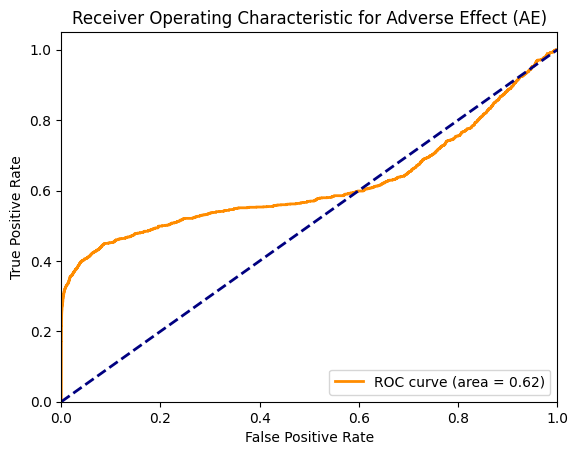

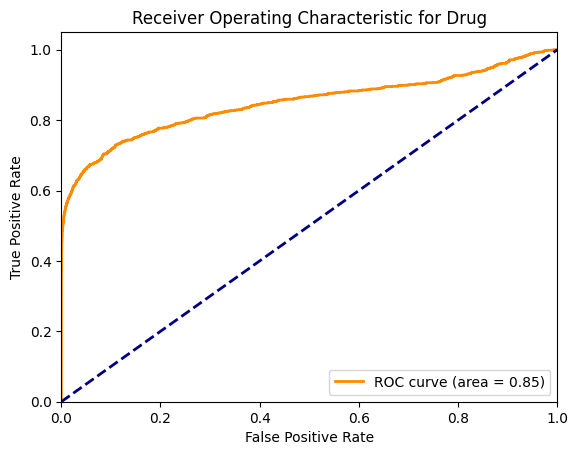

Here the blue line represents the roc of a random classifier, hence making it optimal to compare the actual ROC to!


In [75]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area for each class
fpr_ae, tpr_ae, _ = roc_curve(y_test_ae.ravel(), y_pred_ae.ravel())
roc_auc_ae = auc(fpr_ae, tpr_ae)

fpr_drug, tpr_drug, _ = roc_curve(y_test_drug.ravel(), y_pred_drug.ravel())
roc_auc_drug = auc(fpr_drug, tpr_drug)

# Plot ROC curve for Adverse Effect (AE)
plt.figure()
plt.plot(fpr_ae, tpr_ae, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ae)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Adverse Effect (AE)')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve for Drug
plt.figure()
plt.plot(fpr_drug, tpr_drug, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_drug)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Drug')
plt.legend(loc="lower right")
plt.show()

print("Here the blue line represents the roc of a random classifier, hence making it optimal to compare the actual ROC to!")